In [0]:
!pip install -e git+https://github.com/marcoancona/DeepExplain.git#egg=deepexplain

In [0]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.utils import Sequence
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, ImageDataGenerator
import math
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import sklearn
from sklearn.model_selection import train_test_split
SEED = 2001
from keras import Model

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1tk5CDk-WBjiHCvan5zTI9pf3_fdCnVJF' 

In [245]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1tk5CDk-WBjiHCvan5zTI9pf3_fdCnVJF


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data1a.zip')  
# Dataset is now stored in a Pandas Dataframe

In [248]:
!unzip data1a.zip

Archive:  data1a.zip
   creating: data1a/testing/
   creating: data1a/testing/00-damage/
  inflating: data1a/testing/00-damage/0001.JPEG  
  inflating: data1a/testing/00-damage/0002.JPEG  
  inflating: data1a/testing/00-damage/0003.JPEG  
  inflating: data1a/testing/00-damage/0004.JPEG  
  inflating: data1a/testing/00-damage/0005.JPEG  
  inflating: data1a/testing/00-damage/0006.JPEG  
  inflating: data1a/testing/00-damage/0007.JPEG  
  inflating: data1a/testing/00-damage/0008.JPEG  
  inflating: data1a/testing/00-damage/0009.JPEG  
  inflating: data1a/testing/00-damage/0010.JPEG  
  inflating: data1a/testing/00-damage/0011.JPEG  
  inflating: data1a/testing/00-damage/0012.JPEG  
  inflating: data1a/testing/00-damage/0013.JPEG  
  inflating: data1a/testing/00-damage/0014.JPEG  
  inflating: data1a/testing/00-damage/0015.JPEG  
  inflating: data1a/testing/00-damage/0016.JPEG  
  inflating: data1a/testing/00-damage/0017.JPEG  
  inflating: data1a/testing/00-damage/0018.JPEG  
  inflating

In [0]:
datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [0]:
train_generator=datagen.flow_from_directory(directory="data1a/training/",target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

In [0]:
valid_generator=datagen.flow_from_directory(directory="data1a/validation/",target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

In [0]:
test_generator=datagen.flow_from_directory(directory="data1a/testing/",target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

In [0]:
from keras.applications.vgg16 import VGG16

In [0]:
conv_base=VGG16(include_top=False, weights='imagenet',input_shape=(224, 224, 3))

In [0]:
for layer in conv_base.layers:
    layer.trainable = False

In [0]:
from keras.layers import GlobalAveragePooling2D

In [0]:
flatten = Flatten()
# n1=Dense(256, activation='sigmoid',name='my_dense_1')
n1=GlobalAveragePooling2D()
#n2=Dropout(0.2)
n2 = Dense(1, name='my_dense_2')

In [260]:
inp2 = conv_base.input
out2 = n1(conv_base.output)

model2 = Model(inp2, out2)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [261]:
inp3 = model2.input
out3 = n2(model2.output)

model3 = Model(inp3, out3)
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
n3 = Activation(('sigmoid'))

In [263]:
inp4 = model3.input
out4 = n3(model3.output)

model4 = Model(inp4, out4)
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [267]:
history=model4.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,validation_data=valid_generator, validation_steps=50,shuffle=True,callbacks=callbacks_list)

Epoch 1/10
100/100 [==============================] - 89s 892ms/step - loss: 0.6487 - acc: 0.6803 - val_loss: 0.5737 - val_acc: 0.8221

Epoch 00001: val_acc improved from -inf to 0.82208, saving model to weights.best.hdf5
Epoch 2/10
100/100 [==============================] - 82s 823ms/step - loss: 0.5534 - acc: 0.7919 - val_loss: 0.4973 - val_acc: 0.8377

Epoch 00002: val_acc improved from 0.82208 to 0.83766, saving model to weights.best.hdf5
Epoch 3/10
100/100 [==============================] - 82s 817ms/step - loss: 0.5028 - acc: 0.7956 - val_loss: 0.4576 - val_acc: 0.8303

Epoch 00003: val_acc did not improve from 0.83766
Epoch 4/10
100/100 [==============================] - 83s 826ms/step - loss: 0.4743 - acc: 0.8050 - val_loss: 0.4274 - val_acc: 0.8565

Epoch 00004: val_acc improved from 0.83766 to 0.85649, saving model to weights.best.hdf5
Epoch 5/10
100/100 [==============================] - 82s 824ms/step - loss: 0.4563 - acc: 0.8025 - val_loss: 0.4022 - val_acc: 0.8558

Epoch 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


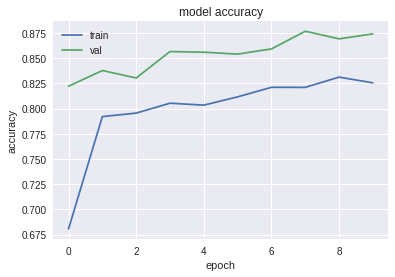

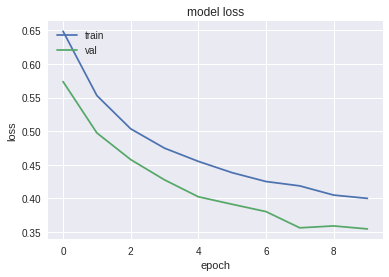

In [269]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
model4.load_weights("weights.best.hdf5")

In [0]:
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [272]:
model4.evaluate_generator(test_generator, steps=50)

[0.33555005723997494, 0.8857340718570509]

In [0]:
from skimage import feature, transform
import numpy as np
import matplotlib.pyplot as plt


def plot(data, xi=None, cmap='RdBu_r', axis=plt, percentile=100, dilation=3.0, alpha=0.8):
    dx, dy = 0.05, 0.05
    xx = np.arange(0.0, data.shape[1], dx)
    yy = np.arange(0.0, data.shape[0], dy)
    xmin, xmax, ymin, ymax = np.amin(xx), np.amax(xx), np.amin(yy), np.amax(yy)
    extent = xmin, xmax, ymin, ymax
    cmap_xi = plt.get_cmap('Greys_r')
    cmap_xi.set_bad(alpha=0)
    overlay = None
    if xi is not None:
        # Compute edges (to overlay to heatmaps later)
        xi_greyscale = xi if len(xi.shape) == 2 else np.mean(xi, axis=-1)
        in_image_upscaled = transform.rescale(xi_greyscale, dilation, mode='constant')
        edges = feature.canny(in_image_upscaled).astype(float)
        edges[edges < 0.5] = np.nan
        edges[:5, :] = np.nan
        edges[-5:, :] = np.nan
        edges[:, :5] = np.nan
        edges[:, -5:] = np.nan
        overlay = edges

    abs_max = np.percentile(np.abs(data), percentile)
    abs_min = abs_max

    
    data = np.mean(data, 2)
    axis.imshow(data, extent=extent, interpolation='none', cmap=cmap, vmin=-abs_min, vmax=abs_max)
    if overlay is not None:
        axis.imshow(overlay, extent=extent, interpolation='none', cmap=cmap_xi, alpha=alpha)
    axis.axis('off')
    return axis

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tempfile, sys, os
sys.path.insert(0, os.path.abspath('..'))

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from deepexplain.tensorflow import DeepExplain

In [0]:
ys=np.array([1])
ys=ys.reshape((1,1))

In [0]:
with DeepExplain(session=K.get_session()) as de:  # <-- init DeepExplain context
    # Need to reconstruct the graph in DeepExplain context, using the same weights.
    # With Keras this is very easy:
    # 1. Get the input tensor to the original model
    input_tensor = model4.layers[0].input
    
    # 2. We now target the output of the last dense layer (pre-softmax)
    # To do so, create a new model sharing the same layers untill the last dense (index -2)
    fModel = Model(inputs=input_tensor, outputs = model4.layers[-2].output)
    target_tensor = fModel(input_tensor)
    
    xs = img_tensor
    ys=ys
    
    attributions_gradin = de.explain('grad*input', target_tensor, input_tensor, xs, ys=ys)
#     attributions_sal   = de.explain('saliency', target_tensor, input_tensor, xs, ys=ys)
#     attributions_ig    = de.explain('intgrad', target_tensor, input_tensor, xs, ys=ys)
#     attributions_dl    = de.explain('deeplift', target_tensor, input_tensor, xs, ys=ys)
#     attributions_elrp  = de.explain('elrp', target_tensor, input_tensor, xs, ys=ys)
#     attributions_occ   = de.explain('occlusion', target_tensor, input_tensor, xs, ys=ys)

In [282]:
%matplotlib inline
n_cols = 2
n_rows = int(len(attributions_gradin) / 2)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(3*n_cols, 3*n_rows))

<Figure size 432x0 with 0 Axes>

grad*input

Text(0.5, 1.0, 'Original')

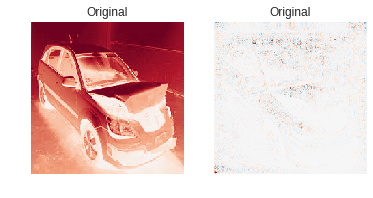

In [238]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(3*n_cols, 3*n_rows))
plot(xs[0].reshape(224,224,3), axis=axes[0]).set_title('Original')
plot(attributions_gradin[0].reshape(224,224,3), axis=axes[1]).set_title('Original')

Saliency Map

Text(0.5, 1.0, 'Original')

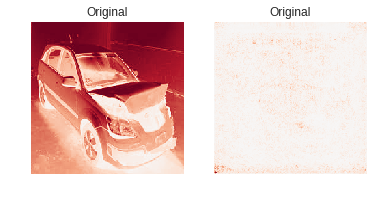

In [239]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(3*n_cols, 3*n_rows))
plot(xs[0].reshape(224,224,3), axis=axes[0]).set_title('Original')
plot(attributions_sal[0].reshape(224,224,3), axis=axes[1]).set_title('Original')


Intgrad

Text(0.5, 1.0, 'Original')

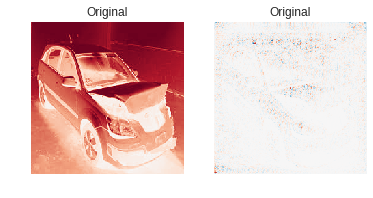

In [240]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(3*n_cols, 3*n_rows))
plot(xs[0].reshape(224,224,3), axis=axes[0]).set_title('Original')
plot(attributions_ig[0].reshape(224,224,3), axis=axes[1]).set_title('Original')

ELRP

Text(0.5, 1.0, 'Original')

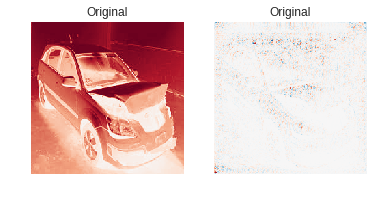

In [241]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(3*n_cols, 3*n_rows))
plot(xs[0].reshape(224,224,3), axis=axes[0]).set_title('Original')
plot(attributions_elrp[0].reshape(224,224,3), axis=axes[1]).set_title('Original')

Using Saliency Maps to generate explanations for why the model is choosing a car as damaged.
The Saliency Map has been showen first, with the original image just below.
We can clearly see that the saliency map is trying to focus on the damaged ares of the cars.


In [0]:
img_path = 'data1a/validation/00-damage/0071.JPEG'

In [0]:
from keras.preprocessing import image
from keras import activations
from matplotlib import pyplot as plt
from vis.visualization import visualize_saliency
from vis.utils import utils
%matplotlib inline

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [0]:
imgt=np.

In [29]:
img_tensor.shape

(1, 224, 224, 3)

In [0]:
layer_idx=-1

In [0]:
class_idx=0

In [0]:
model3.layers[-1].activation = activations.linear
model3 = utils.apply_modifications(model3)

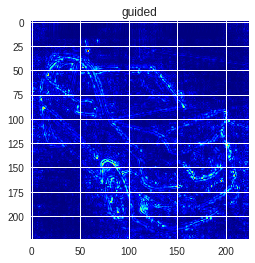

In [0]:
for modifier in ['guided']:
    grads = visualize_saliency(model3, layer_idx, filter_indices=class_idx,seed_input=img_tensor, backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

In [0]:
img_tensor=img_tensor.reshape((224, 224, 3))

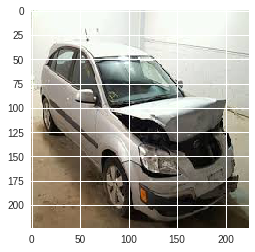

In [0]:
plt.imshow(img_tensor)

In [0]:
img_path = 'data1a/validation/00-damage/0082.JPEG'

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor2 = image.img_to_array(img)
img_tensor2 = np.expand_dims(img_tensor, axis=0)
img_tensor2 /= 255.

In [0]:
layer_idx=-1

In [0]:
class_idx=0

In [0]:
model3.layers[-1].activation = activations.linear
model3 = utils.apply_modifications(model3)

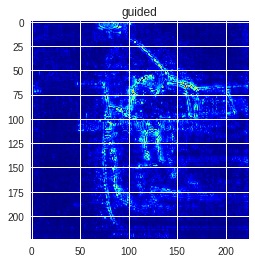

In [0]:
for modifier in ['guided']:
    grads = visualize_saliency(model3, layer_idx, filter_indices=class_idx,seed_input=img_tensor, backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

In [0]:
img_tensor2=img_tensor.reshape((224, 224, 3))

In [0]:
imgt=np.array

In [122]:
imgt[0]=img_tensor

TypeError: ignored

In [0]:
a=[]

In [0]:
a.append(img_tensor)

In [0]:
a.append(img_tensor2)

In [211]:
a=np.asarray(a)

ValueError: ignored

In [127]:
a.shape

(2, 224, 224, 3)

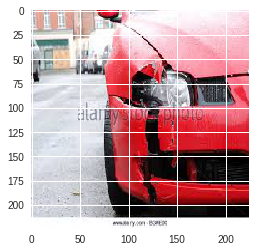

In [0]:
plt.imshow(img_tensor)

In [0]:
img_path = 'data1a/validation/00-damage/0049.jpeg'

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [0]:
layer_idx=-1

In [0]:
class_idx=0

In [0]:
model3.layers[-1].activation = activations.linear
model3 = utils.apply_modifications(model3)

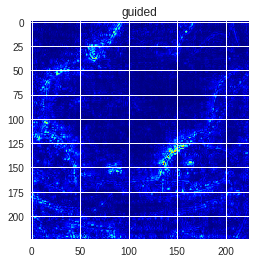

In [0]:
for modifier in ['guided']:
    grads = visualize_saliency(model3, layer_idx, filter_indices=class_idx,seed_input=img_tensor, backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

In [0]:
img_tensor=img_tensor.reshape((224, 224, 3))

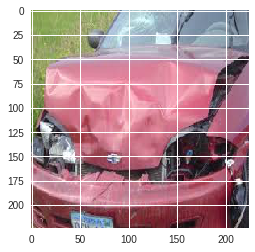

In [0]:
plt.imshow(img_tensor)

In [0]:
img_path = 'data1a/validation/00-damage/0052.JPEG'

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [0]:
layer_idx=-1

In [0]:
class_idx=0

In [0]:
model3.layers[-1].activation = activations.linear
model3 = utils.apply_modifications(model3)

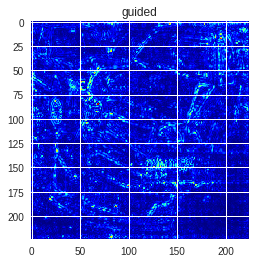

In [0]:
for modifier in ['guided']:
    grads = visualize_saliency(model3, layer_idx, filter_indices=class_idx,seed_input=img_tensor, backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

In [0]:
img_tensor=img_tensor.reshape((224, 224, 3))

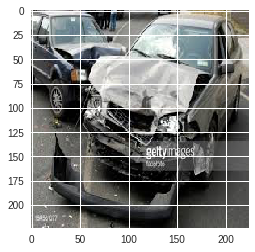

In [0]:
plt.imshow(img_tensor)